In [1]:
###########################################################################################
# SET AND VERIFY THE CURRENT WORKING DIRECTORY (CHANGE AS NEEDED)##########################
###########################################################################################
import os
root_directory = '/media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/'
os.chdir(root_directory) 
print(os.getcwd() + '/')
print(root_directory)

/media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/
/media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/


In [2]:
###########################################################################################
# EXTRACT 5 SECOND VIDEO CLIP CHARACTERISTICS #############################################
###########################################################################################
import cv2

# A function extract video clip characteristics
def extract_video_info(video_path):
    # Open the video file
    video_capture_object = cv2.VideoCapture(video_path)

    # Get the frame count, fps, and duration of the video
    total_frames = int(video_capture_object.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = round(video_capture_object.get(cv2.CAP_PROP_FPS))
    duration_seconds = round(total_frames / fps, 2)
    frame_width = int(video_capture_object.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video_capture_object.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Release the video capture object
    video_capture_object.release()

    return duration_seconds, fps, total_frames, frame_width, frame_height

In [3]:
# Extract details form each 5 second video and compare in table
files = sorted(os.listdir(root_directory + 'videos_folder/'))
# Declare lists to hold clip values
clip_name = []
clip_length = []; 
clip_fps = [];  
clip_total_frames = [];  
clip_frame_width = [];  
clip_frame_height = [];
# Move through all video clip files
for file in files:
    video_path = os.path.join(root_directory + 'videos_folder/', file)
    duration, fps, total_frames, frame_width, frame_height = extract_video_info(video_path)
    clip_name.append(str(file))
    clip_length.append(duration) 
    clip_fps.append(fps)   
    clip_total_frames.append(total_frames)   
    clip_frame_width.append(frame_width)   
    clip_frame_height.append(frame_height) 

In [4]:
import pandas as pd

# Display dataframe comparing 5 second video clip characteristics 
data = {'clip name':clip_name, 'duration (secs)':clip_length, 'fps':clip_fps, 
        'total frames':clip_total_frames, 'frame width':clip_frame_width, 
        'frame height':clip_frame_height}
clip_comparison_df = pd.DataFrame(data)
print(clip_comparison_df.to_string(index=False))
clip_comparison_df.to_csv('output.csv', index=False)

  clip name  duration (secs)  fps  total frames  frame width  frame height
clip_01.mp4             5.07   30           152         1920          1080
clip_02.mp4             5.07   30           152         1920          1080
clip_03.mp4             5.08   24           122         1920          1080
clip_04.mp4             5.08   24           122         1920          1080
clip_05.mp4             5.07   30           152         1920          1080
clip_06.mp4             5.07   30           152         1920          1080
clip_07.mp4             5.07   30           152         1920          1080
clip_08.mp4             5.07   30           152         1920          1080
clip_09.mp4             5.07   30           152         1920          1080
clip_10.mp4             5.07   30           152         1920          1080


In [5]:
###########################################################################################
# EXTRACT RANDOM FRAME FROM EACH 5 SECOND VIDEO CLIP  #####################################
###########################################################################################
import random

# Function to extract a random frame from each video
def random_frame_to_image(video_path, clip_number, output_directory):
    # Open the video file and define video capture object
    video_capture_object = cv2.VideoCapture(video_path)
    
    # Generate a random frame number based on total number of availble video frames
    total_frames = int(video_capture_object.get(cv2.CAP_PROP_FRAME_COUNT))
    random_frame_number = random.randint(0, total_frames - 1)

    # Set the frame position of video capture object using random frame number
    video_capture_object.set(cv2.CAP_PROP_POS_FRAMES, random_frame_number)

    # Read the frame set in video capture object
    ret, frame = video_capture_object.read()
    
    file_name = 'image_' + str(clip_number) + '.jpg'
    
    output_folder = os.path.join(output_directory, file_name)

    # Save the frame as an image
    cv2.imwrite(output_folder, frame)
    
    # Release the video capture object
    video_capture_object.release()

    print("Random frame saved as:", file_name)

In [7]:
# Extract random sample image from each original video clip
# Extract names of video files from folder path to the video files
files = sorted(os.listdir(root_directory + 'videos_folder'))
for file in files:
    # Unique path to each video
    video_path = os.path.join(root_directory + 'videos_folder', file)
    
    #Extract each video's number for later naming of random image
    base_name = os.path.basename(video_path)
    clip_number = base_name[5:-4] # Which will also serve as image name number
    
    # Construct folder to hold random images
    os.makedirs(root_directory + str('images_folder'), exist_ok=True)
    output_directory = os.path.join(root_directory, str('images_folder'))

    # Extract a random frame from the video and save as image
    random_frame_to_image(video_path, clip_number, output_directory)

Random frame saved as: image_01.jpg
Random frame saved as: image_02.jpg
Random frame saved as: image_03.jpg
Random frame saved as: image_04.jpg
Random frame saved as: image_05.jpg
Random frame saved as: image_06.jpg
Random frame saved as: image_07.jpg
Random frame saved as: image_08.jpg
Random frame saved as: image_09.jpg
Random frame saved as: image_10.jpg


In [8]:
###########################################################################################
# INSTALL ULTRALYTICS  ####################################################################
###########################################################################################
import torch

# Install ultralytics for yolo
!pip install ultralytics

In [9]:
###########################################################################################
# TRAIN YOLO OBJECT LABELING MODEL ########################################################
###########################################################################################
!yolo task=detect mode=train epochs=100 data=data_custom.yaml model=yolov8m.pt imgsz=640 batch=8

Ultralytics YOLOv8.2.2 🚀 Python-3.11.7 torch-2.2.2+cu121 CPU (Intel Core(TM) i5-3550 3.30GHz)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data_custom.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

In [10]:
###########################################################################################
# USE YOLO OBJECT LABELING MODEL TO LABEL IMAGE OBJECTS ###################################
###########################################################################################
# Make new directory path to hold newly annotated images
output_directory = os.path.join(root_directory, 'images_annotated_folder');
os.makedirs(output_directory, exist_ok=True);
# Path to original unannotated images
image_directory = os.path.join(root_directory, 'images_folder/*');

In [11]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO('yolov8m_custom.pt')
# Define path to directory containing images for annotation
source = image_directory
# Run annotation on the source
results = model(source, stream=True)  # generator of Results objects
num = 1 # counter for images
# Process results generator
for result in results:   
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.save(filename='./images_annotated_folder/annotated_image_'+ str(num).zfill(2) +'.jpg')  # save to disk
    num = num + 1

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


image 1/10 /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/images_folder/image_01.jpg: 384x640 3 lands, 3 oceans, 1 sky, 2 structures, 663.7ms
image 2/10 /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/images_folder/image_02.jpg: 384x640 1 beach, 1 foliage, 1 ocean, 1 structure, 506.2ms
image 3/10 /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/images_folder/image_03.jpg: 384x640 4 beachs, 5 lands, 1 ocean, 5 skys, 4 structures, 485.3ms
image 4/10 /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/images_folder/image_04.jpg: 384x640 2 beachs, 3 foliages, 1 ocean, 1 sky, 1 structure, 540.0ms
image 5/10 /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_At

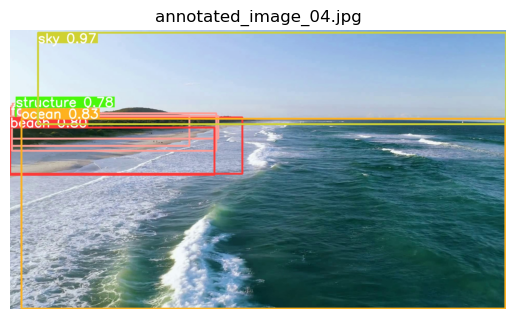

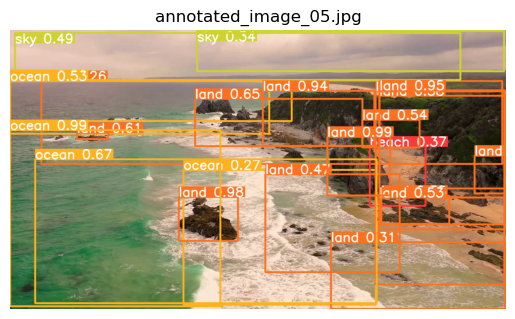

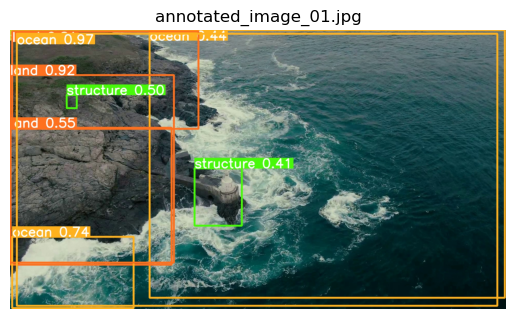

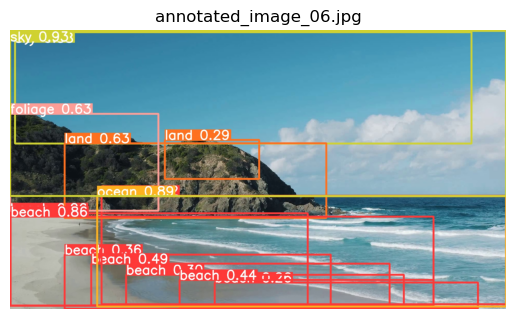

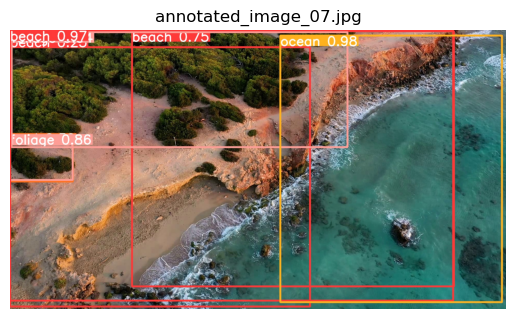

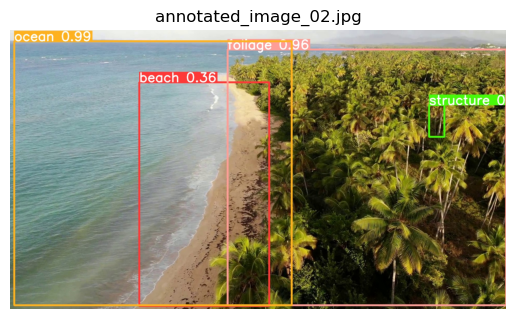

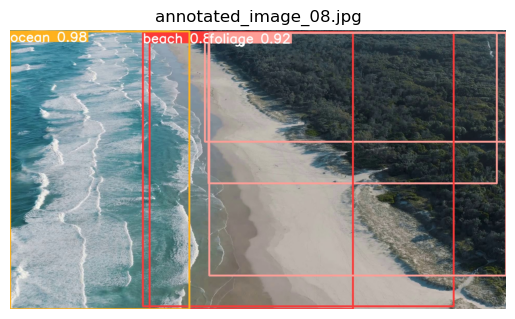

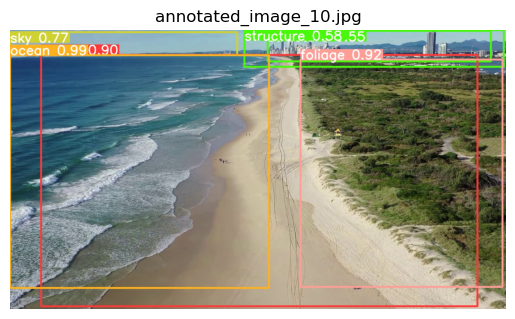

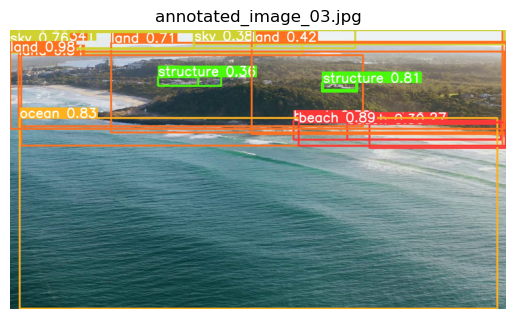

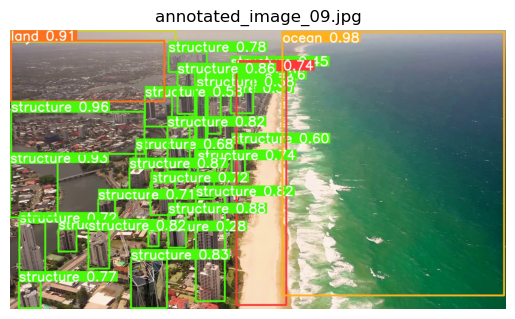

In [12]:
# Display annotated images
import os
import cv2
import matplotlib.pyplot as plt

# A function to display annotated images
def display_sample_images(directory, num_images=5):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.endswith('.jpg')]

    # Display each image
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        image = cv2.imread(image_path)  # Read image using OpenCV
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        plt.imshow(image)
        plt.title(image_file)
        plt.axis('off')
        plt.show()

# Display annotated images
image_directory = os.path.join(root_directory, 'images_annotated_folder')
num_images=10
display_sample_images(image_directory, num_images)

In [13]:
###########################################################################################
# USE YOLO OBJECT LABELING MODEL TO LABEL VIDEO OBJECTS ###################################
###########################################################################################
# Make new directory path to hold newly annotated videos
output_directory = os.path.join(root_directory, 'videos_annotated_folder');
os.makedirs(output_directory, exist_ok=True);
# Path to original unannotated videos
video_directory = os.path.join(root_directory, 'videos_folder');

In [14]:
# List all files in the video directory
video_files = sorted(os.listdir(video_directory))
# Print the list of video files
print("Files in the directory:")
for video_file in video_files:
    print(video_file)

Files in the directory:
clip_01.mp4
clip_02.mp4
clip_03.mp4
clip_04.mp4
clip_05.mp4
clip_06.mp4
clip_07.mp4
clip_08.mp4
clip_09.mp4
clip_10.mp4


In [15]:
# A function to join .jpg images into an .mp4 file
def join_images_to_video(path_to_images, video_file):
    # List all .jpg files in the directory containing .jpg images
    images = [img for img in os.listdir(path_to_images) if img.endswith(".jpg")]

    # Sort the images based on their filenames
    images.sort()

    # Determine the width and height of the first image
    img = cv2.imread(os.path.join(path_to_images, images[0]))
    height, width, _ = img.shape

    # Define the output video file name
    video_name = os.path.join(path_to_images, 'annotated_' + video_file)

    # Define the video codec
    codec = cv2.VideoWriter_fourcc(*'mp4v')

    # Create a video writer object
    fps = 30 # Frames per second
    video_writer_object = cv2.VideoWriter(video_name, codec, fps, (width, height))

    # Iterate through each image and add it to the video
    for image in images:
        img_path = os.path.join(path_to_images, image)
        frame = cv2.imread(img_path)
        video_writer_object.write(frame)
        # Delete the image file after it has been added to the video
        os.remove(img_path)

    # Release the video writer
    video_writer_object.release()

    print(f"Video saved as {video_name}")

In [16]:
# Load custom yolov8m_custom model
model = YOLO('yolov8m_custom.pt')
for video_file in video_files:
    # Define path to directory containing videos for annotation
    source = os.path.join(video_directory, video_file)
    # Run annotation on the source
    results = model(source, stream=True)
    num = 1 # counter for images
    for result in results:   
        boxes = result.boxes  # Boxes object for bounding box outputs
        masks = result.masks  # Masks object for segmentation masks outputs
        keypoints = result.keypoints  # Keypoints object for pose outputs
        probs = result.probs  # Probs object for classification outputs
        # YOLO is only able to save annotated .jpg images (??)
        result.save(filename='./videos_annotated_folder/annotated_video_image_'+ str(num).zfill(3) + '.jpg' )  
        num = num + 1
    # Join the annotated images into final annotated .mp4 video clip
    #   then delete the separate annotated images from the directory
    path_to_images = './videos_annotated_folder/'
    join_images_to_video(path_to_images, video_file)


video 1/1 (frame 1/152) /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/videos_folder/clip_01.mp4: 384x640 3 lands, 3 oceans, 1 sky, 3 structures, 526.7ms
video 1/1 (frame 2/152) /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/videos_folder/clip_01.mp4: 384x640 3 lands, 2 oceans, 1 sky, 3 structures, 540.5ms
video 1/1 (frame 3/152) /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/videos_folder/clip_01.mp4: 384x640 3 lands, 2 oceans, 1 sky, 2 structures, 551.7ms
video 1/1 (frame 4/152) /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/videos_folder/clip_01.mp4: 384x640 3 lands, 2 oceans, 1 sky, 1 structure, 517.1ms
video 1/1 (frame 5/152) /media/ijmg/

In [17]:
###########################################################################################
# TRAIN YOLO OBJECT SEGMENTATION MODEL ####################################################
###########################################################################################
!yolo task=segment mode=train epochs=100 data=data_custom.yaml model=yolov8m-seg.pt imgsz=640 batch=8

Ultralytics YOLOv8.2.2 🚀 Python-3.11.7 torch-2.2.2+cu121 CPU (Intel Core(TM) i5-3550 3.30GHz)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=data_custom.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

In [18]:
###########################################################################################
# USE YOLO OBJECT SEGMENTATION MODEL TO SEGMENT IMAGE OBJECTS #############################
###########################################################################################
# Make new directory path to hold newly segmented images
output_directory = os.path.join(root_directory, 'images_segmented_folder');
os.makedirs(output_directory, exist_ok=True);
# Path to original unannotated images
image_directory = os.path.join(root_directory, 'images_folder/*');

In [19]:
from ultralytics import YOLO

# Load a custom yolov8m-seg_custom model
model = YOLO('yolov8m-seg_custom.pt')
# Define path to directory containing images for annotation
source = image_directory
# Run annotation on the source
results = model(source, stream=True)  # generator of Results objects
num = 1 # counter for images
# Process results generator
for result in results:   
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.save(filename='./images_segmented_folder/segmented_image_'+ str(num).zfill(2) +'.jpg')  
    num = num + 1


image 1/10 /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/images_folder/image_01.jpg: 384x640 2 lands, 1 ocean, 2 structures, 832.2ms
image 2/10 /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/images_folder/image_02.jpg: 384x640 1 beach, 2 foliages, 1 ocean, 606.6ms
image 3/10 /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/images_folder/image_03.jpg: 384x640 1 beach, 1 land, 1 ocean, 1 sky, 4 structures, 620.6ms
image 4/10 /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/images_folder/image_04.jpg: 384x640 1 foliage, 1 ocean, 1 sky, 3 structures, 609.3ms
image 5/10 /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_

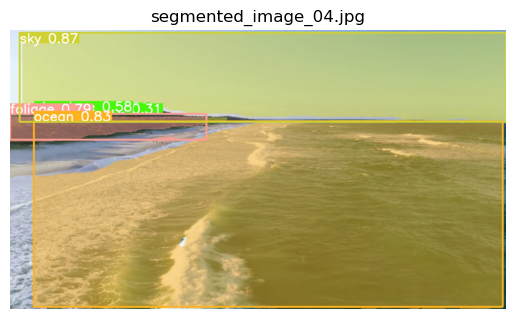

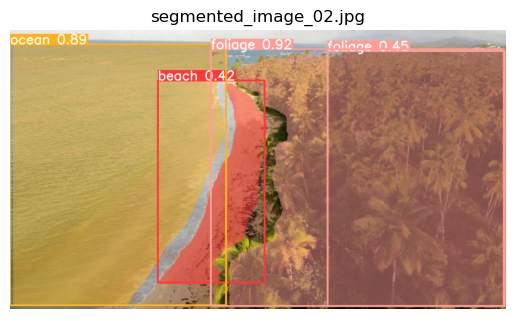

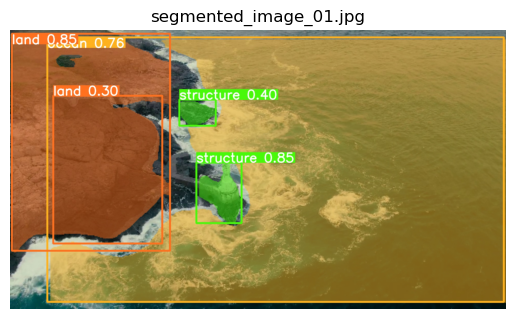

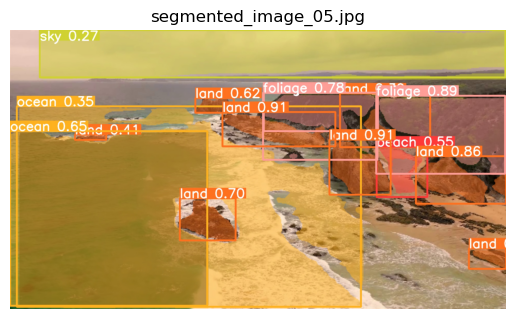

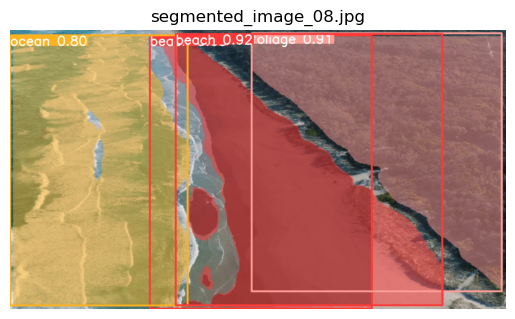

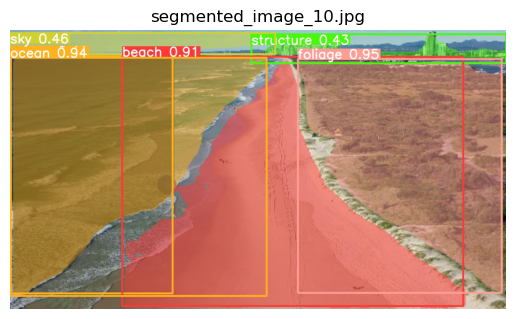

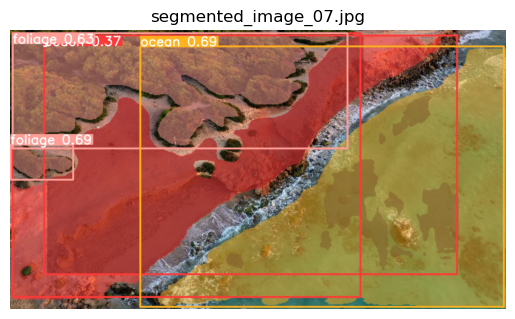

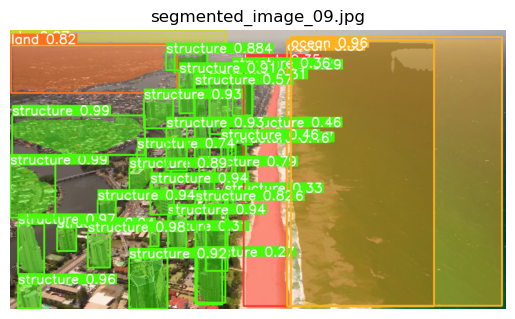

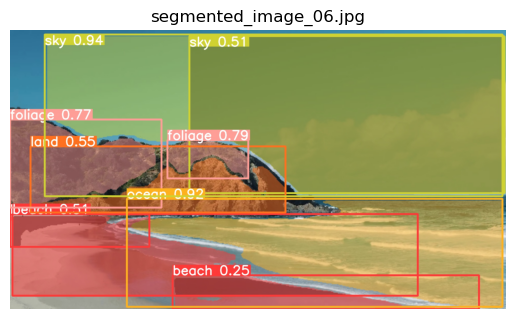

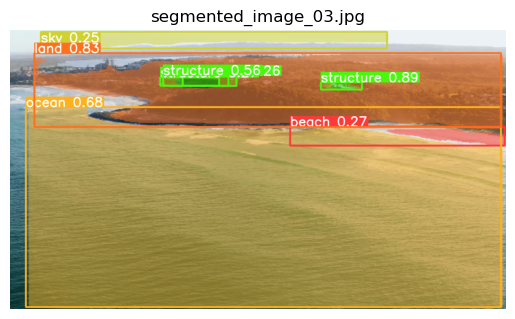

In [20]:
# Display segmented images
import os
import cv2
import matplotlib.pyplot as plt

# A function to display segmented images
def display_sample_images(directory, num_images=5):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.endswith('.jpg')]

    # Display each image
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        image = cv2.imread(image_path)  # Read image using OpenCV
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        plt.imshow(image)
        plt.title(image_file)
        plt.axis('off')
        plt.show()

# Display annotated images
image_directory = os.path.join(root_directory, 'images_segmented_folder')
num_images=10
display_sample_images(image_directory, num_images)

In [21]:
###########################################################################################
# USE YOLO OBJECT SEGMENTATION MODEL TO SEGMENT VIDEO OBJECTS #############################
###########################################################################################
# Make new directory path to hold newly segmented videos
output_directory = os.path.join(root_directory, 'videos_segmented_folder');
os.makedirs(output_directory, exist_ok=True);
# Path to original unsegmented videos
video_directory = os.path.join(root_directory, 'videos_folder');

In [22]:
# List all files in the video directory
video_files = sorted(os.listdir(video_directory))
# Print the list of video files
print("Files in the directory:")
for video_file in video_files:
    print(video_file)

Files in the directory:
clip_01.mp4
clip_02.mp4
clip_03.mp4
clip_04.mp4
clip_05.mp4
clip_06.mp4
clip_07.mp4
clip_08.mp4
clip_09.mp4
clip_10.mp4


In [23]:
# A function to join .jpg images into an .mp4 file
def join_images_to_video(path_to_images, video_file):
    # List all .jpg files in the directory containing .jpg images
    images = [img for img in os.listdir(path_to_images) if img.endswith(".jpg")]

    # Sort the images based on their filenames
    images.sort()

    # Determine the width and height of the first image
    img = cv2.imread(os.path.join(path_to_images, images[0]))
    height, width, _ = img.shape

    # Define the output video file name
    video_name = os.path.join(path_to_images, 'segmented_' + video_file)

    # Define the video codec
    codec = cv2.VideoWriter_fourcc(*'mp4v')

    # Create a video writer object
    fps = 30 # Frames per second
    video_writer_object = cv2.VideoWriter(video_name, codec, fps, (width, height))

    # Iterate through each image and add it to the video
    for image in images:
        img_path = os.path.join(path_to_images, image)
        frame = cv2.imread(img_path)
        video_writer_object.write(frame)
        # Delete the image file after it has been added to the video
        os.remove(img_path)

    # Release the video writer
    video_writer_object.release()

    print(f"Video saved as {video_name}")


In [24]:
# Load a custom YOLOv8m-seg_custom model
model = YOLO('yolov8m-seg_custom.pt')
for video_file in video_files:
    # Define path to directory containing videos for segmentation
    source = os.path.join(video_directory, video_file)
    # Run annotation on the source
    results = model(source, stream=True)
    num = 1 # counter for images
    for result in results:   
        boxes = result.boxes  # Boxes object for bounding box outputs
        masks = result.masks  # Masks object for segmentation masks outputs
        keypoints = result.keypoints  # Keypoints object for pose outputs
        probs = result.probs  # Probs object for classification outputs
        # YOLO is only able to save segmented .jpg images (??)
        result.save(filename='./videos_segmented_folder/segmented_video_image_'+ str(num).zfill(3) + '.jpg' )  
        num = num + 1
    # Join the annotated images into final annotated .mp4 video clip
    #   then delete the separate annotated images from the directory
    path_to_images = './videos_segmented_folder/'
    join_images_to_video(path_to_images, video_file)


video 1/1 (frame 1/152) /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/videos_folder/clip_01.mp4: 384x640 1 land, 1 ocean, 1 structure, 714.1ms
video 1/1 (frame 2/152) /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/videos_folder/clip_01.mp4: 384x640 1 land, 1 ocean, 1 structure, 678.9ms
video 1/1 (frame 3/152) /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/videos_folder/clip_01.mp4: 384x640 1 land, 1 ocean, 1 structure, 1091.5ms
video 1/1 (frame 4/152) /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/videos_folder/clip_01.mp4: 384x640 1 land, 1 ocean, 1 structure, 627.8ms
video 1/1 (frame 5/152) /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_At

In [25]:
###########################################################################################
# USE YOLO OBJECT SEGMENTATION MODEL TO SEGMENT UNSEEN VIDEO OBJECTS ######################
###########################################################################################
# Make new directory path to hold newly segmented videos
output_directory = os.path.join(root_directory, 'videos_test_segmented_folder');
os.makedirs(output_directory, exist_ok=True);
# Path to unseen unsegmented videos
video_test_directory = os.path.join(root_directory, 'videos_test_folder');

In [26]:
# List all files in the video directory
video_files = sorted(os.listdir(video_test_directory))
# Print the list of video files
print("Files in the directory:")
for video_file in video_files:
    print(video_file)

Files in the directory:
test_01.mp4
test_02.mp4
test_03.mp4
test_04.mp4
test_05.mp4
test_06.mp4
test_07.mp4
test_08.mp4
test_09.mp4
test_10.mp4
test_11.mp4
test_12.mp4
test_13.mp4
test_14.mp4
test_15.mp4
test_16.mp4
test_17.mp4
test_18.mp4
test_19.mp4
test_20.mp4
test_21.mp4
test_22.mp4
test_23.mp4


In [27]:
# Load a custom YOLOv8m-seg_custom segmentation model
model = YOLO('yolov8m-seg_custom.pt')
for video_file in video_files:
    # Define path to directory containing videos for segmentation
    source = os.path.join(video_test_directory, video_file)
    # Run annotation on the source
    results = model(source, stream=True)
    num = 1 # counter for images
    for result in results:   
        boxes = result.boxes  # Boxes object for bounding box outputs
        masks = result.masks  # Masks object for segmentation masks outputs
        keypoints = result.keypoints  # Keypoints object for pose outputs
        probs = result.probs  # Probs object for classification outputs
        # YOLO is only able to save segmented .jpg images (??)
        result.save(filename='./videos_test_segmented_folder/segmented_video_image_'+ str(num).zfill(3) + '.jpg' )  
        num = num + 1
    # Join the annotated images into final annotated .mp4 video clip
    #   then delete the separate annotated images from the directory
    path_to_images = './videos_test_segmented_folder/'
    join_images_to_video(path_to_images, video_file)


video 1/1 (frame 1/146) /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/videos_test_folder/test_01.mp4: 384x640 5 beachs, 3 foliages, 1 land, 2 oceans, 1 sky, 1806.4ms
video 1/1 (frame 2/146) /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/videos_test_folder/test_01.mp4: 384x640 5 beachs, 3 foliages, 1 land, 2 oceans, 1 sky, 922.5ms
video 1/1 (frame 3/146) /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/videos_test_folder/test_01.mp4: 384x640 5 beachs, 3 foliages, 2 lands, 2 oceans, 1 sky, 602.1ms
video 1/1 (frame 4/146) /media/ijmg/SSD_FOUR_TB/ACADEMICS_101/a_Florida_Atlantic_University/MSOE/COT_5930_Dig_Image_Process/PROJECT/video_labeling_segmenting/videos_test_folder/test_01.mp4: 384x640 4 beachs, 3 foliages, 2 lands, 2 oceans,